# 相関分析
統計データには二変数間で相互に数値が作用するものがある。このようなデータを探ることでデータの傾向によって把握することや変数選択をするときに削除する変数を見つけやすくなる。

## ライブラリのインポート

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## データの読み込み

In [2]:
df = pd.read_csv("boston.csv")
df.head()

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


## 相関係数

In [3]:
var1 = df["PRICE"].values
var2 = df["LSTAT"].values

In [4]:
print("corr:%.3f"%(np.corrcoef([var1, var2])[0][1]))

corr:-0.738


## 散布図を使用して相関の確認

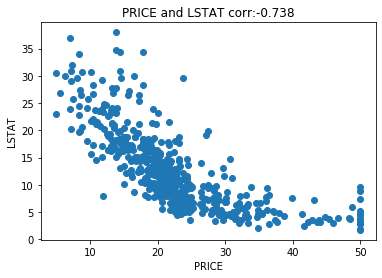

In [5]:
plt.scatter(var1, var2)
plt.title("PRICE and LSTAT corr:%.3f"%(np.corrcoef([var1, var2])[0][1]))
plt.xlabel("PRICE")
plt.ylabel("LSTAT")
plt.show()

相関係数の値としては大きいが、傾向としては二字曲線の形状になっていることがわかる。

## 異なるカテゴリの同一変数による相関
相関係数の数値について、カテゴリとなっている変数によって区分けして相関を分析することでカテゴリが影響しているかを把握する。

In [6]:
df0 = df.query("CHAS == 0")
df1 = df.query("CHAS == 1")

In [7]:
col1 = "AGE"
col2 = "NOX"
var1_0 = df0[col1].values
var2_0 = df0[col2].values
var1_1 = df1[col1].values
var2_1 = df1[col2].values

In [8]:
print("CASE CHAS=0 corr:%.3f"%(np.corrcoef([var1_0, var2_0])[0][1]))
print("CASE CHAS=1 corr:%.3f"%(np.corrcoef([var1_1, var2_1])[0][1]))

CASE CHAS=0 corr:0.746
CASE CHAS=1 corr:0.590


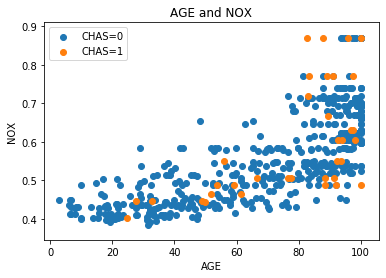

In [9]:
plt.scatter(var1_0, var2_0, label="CHAS=0")
plt.scatter(var1_1, var2_1, label="CHAS=1")
plt.xlabel(col1)
plt.ylabel(col2)
plt.legend()
plt.title(col1+" and "+col2)
plt.show()

## 全変数での相関係数
Pandasの機能を使用することで全変数の相関係数を算出することができる。また、PandasやNumpyのバージョンによってはseabornライブラリを使用して散布図行列を図示できる。

In [10]:
df.corr()

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
PRICE,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


## p値の算出
相関について、自由度と相関係数があればt値を算出する事ができるため、そこからスチューデントのt検定(等分散を仮定したt検定)を用いてp値を算出できる。

ここで、相関の検定では帰無仮説を「相関が0である」として対立仮説を「相関が0でない」となり、p値が有意水準を下回った場合は「無相関ではない」ということになる。そのため、p値の解釈としては「たまたま相関が0である確率」となる。

データは

In [11]:
A = [2, 3, 5, 6, 3, 4, 7, 5]
B = [4, 3, 8, 7, 5, 4, 8, 9]
corr = np.corrcoef([A, B])[0][1]
t_val = (abs(corr) * np.sqrt(len(A) - 2)) / np.sqrt(1 - corr ** 2)
p_val = stats.ttest_ind(A, B, equal_var=True)
print("Corr:"+str(corr))
print("T-value:"+str(t_val))
print("P-value:"+str(p_val[1] * 2))

Corr:0.785081015728862
T-value:3.1047293380092063
P-value:0.25213129498735687


## 偏相関係数
相関係数を算出してみると直接的に関係なさそうなのに高い絶対値を出すことがある。そこで、第三の因子を考慮する必要がある。

例えば部屋の大きさと家賃の相関は一般的である。また、築年数と家の大きさについても一般的に古い家は大きいため一般的である。しかし、家賃と築年数について正の相関が現れた場合は古い物件ほど安くなるという常識に反している。ここで、家賃と築年数を第三の変数で家の大きさの影響を考慮した相関係数を算出する必要がある。

ここで

部屋の大きさと家賃の相関係数：0.841

部屋の大きさと築年数の相関係数：0.516

家賃と築年数の相関係数：0.245

とする。

データは東京図書『統計学基礎』p32の相関係数を使用している。

In [12]:
r_xy = 0.841
r_xz = 0.516
r_yz = 0.245
r_yz_x = (r_yz - r_xy * r_xz) / (np.sqrt(1 - r_xy ** 2) * np.sqrt(1 - r_xz ** 2))
print("r(yz・x):%.3f"%(r_yz_x))

r(yz・x):-0.408
